In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
try:
    df_household_convert = pd.read_csv(
        "data/household_power_consumption.txt",
        sep=";",
        dtype=str
    )

    df_household_convert.to_parquet('data/household_power_consumption.parquet', engine='fastparquet', index=False)
except FileNotFoundError:
    print("Arquivo de ref não existe")
except Exception as e:
    print(e)

Arquivo de ref não existe


### 1. Carregue o dataset e exiba as 10 primeiras linhas.

In [3]:
df_household = pd.read_parquet(
    "data/household_power_consumption.parquet",
    engine='fastparquet',
)

df_household.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.000
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.000
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.000
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.000
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.000


---

### 2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.

- Global_active_power:
  A energia real que está sendo consumida pela residência para realizar trabalho útil.

- Global_reactive_power:
  A energia que circula no sistema elétrico, mas não é convertida em trabalho útil.


---

### 3. Verifique se existem valores ausentes no dataset. Quantifique-os.

In [4]:
for col in [
    "Global_active_power",
    "Global_reactive_power",
    "Voltage",
    "Global_intensity",
    "Sub_metering_1",
    "Sub_metering_2",
    "Sub_metering_3",
]:
    df_household[col] = pd.to_numeric(df_household[col], errors='coerce')

In [5]:
df_household.info()
df_household.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
df_null_data = pd.DataFrame(
    {
        "nao_nulos": df_household.notna().sum(),
        "nulos": df_household.isna().sum(),
        "percentual (%)": df_household.isna().mean() * 100,
    }
)
df_null_data

,nao_nulos,nulos,percentual (%)
Date,2075259,0,0.000000
Time,2075259,0,0.000000
Global_active_power,2049280,25979,1.251844
Global_reactive_power,2049280,25979,1.251844
Voltage,2049280,25979,1.251844
Global_intensity,2049280,25979,1.251844
Sub_metering_1,2049280,25979,1.251844
Sub_metering_2,2049280,25979,1.251844
Sub_metering_3,2049280,25979,1.251844


---

### 4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana correspondente


In [7]:
def dia_da_semana(dia: pd.Timestamp):
    dia_semana = datetime.date.weekday(dia)
    if dia_semana == 0:
        return "Segunda"
    elif dia_semana == 1:
        return "Terça"
    elif dia_semana == 2:
        return "Quarta"
    elif dia_semana == 3:
        return "Quinta"
    elif dia_semana == 4:
        return "Sexta"
    elif dia_semana == 5:
        return "Sabado"
    elif dia_semana == 6:
        return "Domingo"
    else:
        return "erro"

In [8]:
df_household['Date'] = pd.to_datetime(df_household['Date'], dayfirst=True)
df_household['week_day'] = df_household['Date'].apply(lambda x: dia_da_semana(x))

In [9]:
df_household.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,week_day
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Sabado
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Sabado
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Sabado
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Sabado
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Sabado


---

### 5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.


In [10]:
df_household['year'] = df_household['Date'].apply(lambda x: x.year)

In [11]:
df_household.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,week_day,year
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Sabado,2006
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Sabado,2006
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Sabado,2006
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Sabado,2006
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Sabado,2006


In [12]:
df_household_group_by_year = (
    df_household.groupby(["year"])
    .agg({"Global_active_power": "mean"})
    .reset_index()
)
df_household_group_by_year[df_household_group_by_year['year'] == 2007]
# df_household_group_by_year.info()

,year,Global_active_power
1,2007,1.117008


---

### 6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.


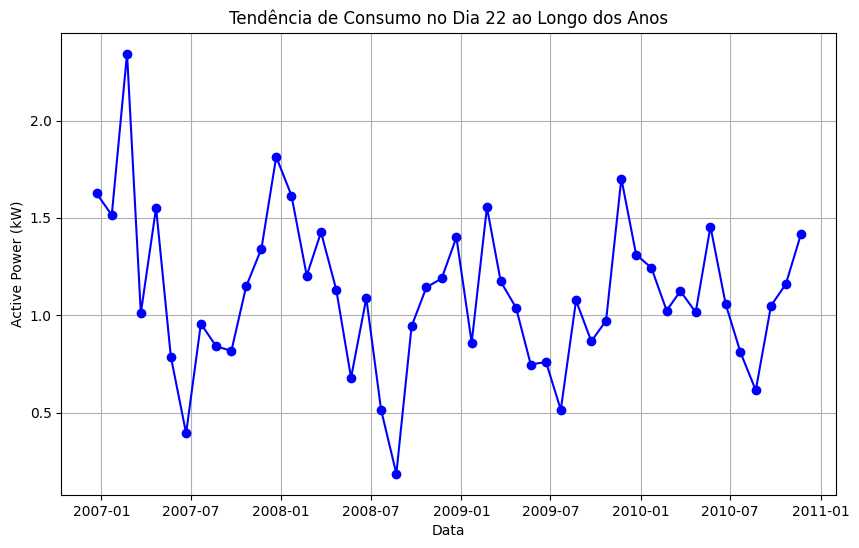

In [13]:
df_household_group_by_date = (
    df_household.groupby(["year", "Date"])
    .agg({"Global_active_power": "mean", "Voltage": "mean"})
    .reset_index()
)

df_household_group_by_date["day"] = df_household_group_by_date["Date"].apply(
    lambda x: x.day
)

# day_consumption = df_household_group_by_date[["year", "day", "Global_active_power"]]
day_consumption = df_household_group_by_date.copy()
day_consumption = day_consumption[day_consumption["day"] == 22]

# Plotar a tendência de consumo ao longo dos anos
plt.figure(figsize=(10, 6))
plt.plot(
    day_consumption["Date"],
    day_consumption["Global_active_power"],
    marker="o",
    linestyle="-",
    color="b",
)
plt.xlabel("Data")
plt.ylabel("Active Power (kW)")
plt.title("Tendência de Consumo no Dia 22 ao Longo dos Anos")
plt.grid(True)
plt.show()


---

### 7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?

In [14]:
mean_consuption = df_household_group_by_date[["Date", "Voltage"]]

fig = px.bar(
    mean_consuption,
    x="Date",
    y="Voltage",
    title="Voltagem / ano",
    text="Voltage",
)
fig.update_layout(
    width=800,
    height=800,
)

fig.show()

> Voltagem é algo estável ao longo do tempo

--- 

### 8. Calcule o consumo médio por mês em todo o período disponível no dataset.


In [15]:
month_consuption = df_household_group_by_date.copy()
month_consuption['month'] = month_consuption['Date'].apply(lambda x: x.month)
month_consuption_grouped = month_consuption.groupby("month")['Global_active_power'].mean().round(5).reset_index()

fig = px.bar(
    month_consuption_grouped,
    x="month",
    y="Global_active_power",
    title="Comsumo / mês",
    text="Global_active_power",
)
fig.update_layout(
    width=800,
    height=800,
)

fig.show()

--- 

### 9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).

In [16]:
max_consuption_day = df_household.copy()

max_value = max(max_consuption_day['Global_active_power'])

max_consuption_day = max_consuption_day[max_consuption_day['Global_active_power'] == max_value]

max_consuption_day

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,week_day,year
1150545,2009-02-22,17:09:00,11.122,0.174,229.78,48.4,35.0,69.0,16.0,Domingo,2009


--- 

### 10. Compare o consumo médio de energia ativa global em dias de semana versus finais desemana.

In [17]:
week_day_consuption = df_household.groupby('week_day')['Global_active_power'].mean().round(3).reset_index()

fig = px.bar(
    week_day_consuption,
    x="week_day",
    y="Global_active_power",
    title="Comsumo / dia da semana",
    text="Global_active_power",
)
fig.update_layout(
    width=800,
    height=800,
)

fig.show()

> O consumo é maior aos finais de semana

--- 

11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.

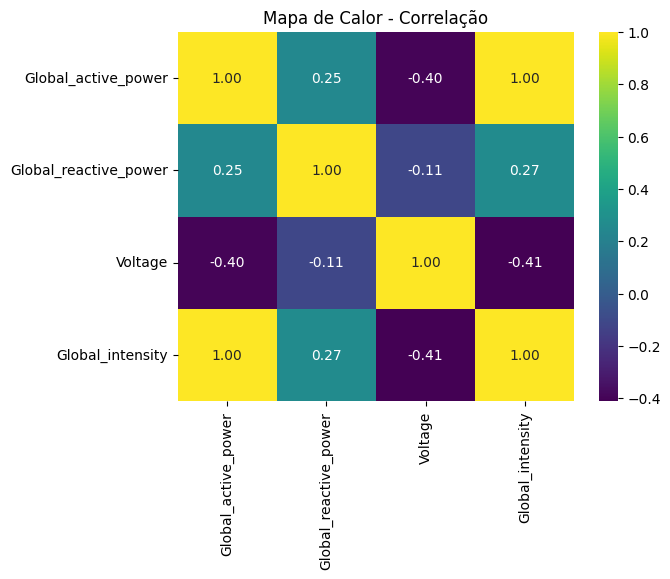

In [22]:

df_correlation = df_household[
    ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]
].copy()

# Calcula a matriz de correlação
corr = df_correlation.corr()

# Cria o mapa de calor
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis")

plt.title("Mapa de Calor - Correlação")
plt.show()

> Sem correlação

---

### 12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1,Sub_metering_2 e Sub_metering_3

In [24]:
'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'

def soma_sub_metering(row):
    soma = row['Sub_metering_1'] + row['Sub_metering_2'] + row['Sub_metering_3']
    return soma

df_household['Total_Sub_metering'] = df_household.apply(lambda x: soma_sub_metering(x), axis=1)
df_household.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,week_day,year,Total_Sub_metering
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Sabado,2006,18.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Sabado,2006,17.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Sabado,2006,19.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Sabado,2006,18.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Sabado,2006,18.0


--- 

### 13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.

In [44]:
df_household['simple_date'] = df_household['Date'].apply(lambda x: x.strftime("%Y-%b"))
df_household_group_by_simple_date = df_household.groupby(['simple_date']).agg({'Total_Sub_metering': 'mean'}).reset_index()
global_consuption_mean = df_household['Global_active_power'].mean()
df_household_group_by_simple_date.head()

,simple_date,Total_Sub_metering
0,2006-Dec,10.873181
1,2007-Apr,6.839375
2,2007-Aug,6.979336
3,2007-Dec,11.636551
4,2007-Feb,9.486135


In [45]:
df_household_group_by_simple_date['dif_power_metering'] = df_household_group_by_simple_date['Total_Sub_metering'].apply(lambda x: global_consuption_mean - x)
df_household_group_by_simple_date.head()

,simple_date,Total_Sub_metering,dif_power_metering
0,2006-Dec,10.873181,-9.781566
1,2007-Apr,6.839375,-5.747760
2,2007-Aug,6.979336,-5.887721
3,2007-Dec,11.636551,-10.544936
4,2007-Feb,9.486135,-8.394520


In [46]:
fig = px.bar(
    df_household_group_by_simple_date,
    x="simple_date",
    y="dif_power_metering",
    title="Comsumo / dia da semana",
    text="dif_power_metering",
)
fig.update_layout(
    width=800,
    height=800,
)

fig.show()

> nenhum mês possui um Total_Sub_metering maior que a média de Global_active_power

--- 

### 14. Faça um gráfico de série temporal do Voltage para o ano de 2008.

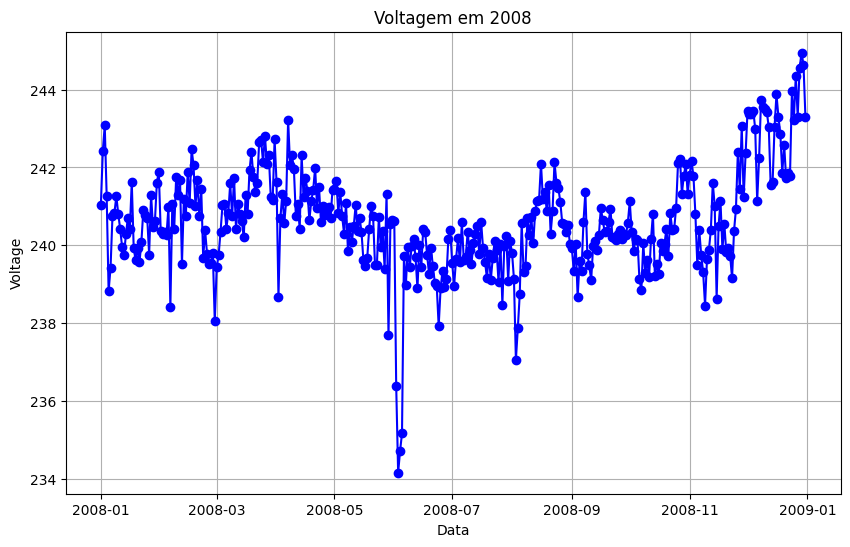

In [50]:
df_voltage_year = df_household[
    [
        "Date",
        "Voltage",
        "year",
    ]
].copy()

df_voltage_year = df_voltage_year[df_voltage_year['year'] == 2008]

df_voltage_year_grouped = df_voltage_year.groupby(['Date','year'])['Voltage'].mean().round(2).reset_index()

# Plotar a tendência de consumo ao longo dos anos
plt.figure(figsize=(10, 6))
plt.plot(
    df_voltage_year_grouped["Date"],
    df_voltage_year_grouped["Voltage"],
    marker="o",
    linestyle="-",
    color="b",
)
plt.xlabel("Data")
plt.ylabel("Voltage")
plt.title("Voltagem em 2008")
plt.grid(True)
plt.show()

--- 

### 15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte)

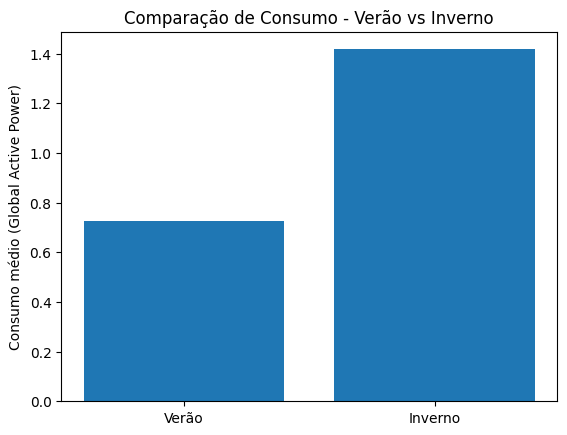

In [51]:
df_household["Month"] = df_household["Date"].dt.month
verao = df_household[df_household["Month"].isin([6, 7, 8])]
inverno = df_household[df_household["Month"].isin([12, 1, 2])]

consumo_verao = verao["Global_active_power"].mean()
consumo_inverno = inverno["Global_active_power"].mean()

plt.bar(["Verão", "Inverno"], [consumo_verao, consumo_inverno])
plt.ylabel("Consumo médio (Global Active Power)")
plt.title("Comparação de Consumo - Verão vs Inverno")
plt.show()

> O consumo no inverno é quase o dobro que no verão

--- 

### 16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição deGlobal_active_power é semelhante à da base completa.